# Project: Evaluation GDP per sector for several countries

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In the present project, four variable will be analysed. The first three refers to the economy sectors: agriculture, industry, and services; the last one is the GDP per capita; Based on those data the following questions will be enseared:

* From where the richness of the countries come from?
* Which countries had the most increase in the GDP/per capita over the past 5 decades?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='white')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

#### Sector databases
The economy GDP is divided into three sectors: agriculture, industry, and services.

For all three sectors, the value add is the net output of a sector after adding up all outputs and subtracting intermediate inputs. It is calculated without making deductions for depreciation of fabricated assets or depletion and degradation of natural resources. The origin of value added is determined by the International Standard Industrial Classification (ISIC), revision 3. Note: For VAB countries, gross value added at factor cost is used as the denominator.

##### Agriculture (% of GDP)
*description*: Agriculture corresponds to ISIC divisions 1-5 and includes forestry, hunting, and fishing, as well as cultivation of crops and livestock production. 

*source link*: https://data.worldbank.org/indicator/NV.AGR.TOTL.ZS

In [2]:
df_agriculture = pd.read_csv('./data/agriculture_percent_of_gdp.csv', index_col=['country'])
df_agriculture.head(3)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2620,0.2370,0.2440,0.2280,0.221,0.206,0.211,0.205,0.203,0.211
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1800,0.1820,0.1880,0.1960,0.200,0.198,0.198,0.190,0.184,0.186
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0847,0.0811,0.0877,0.0985,0.103,0.116,0.122,0.119,0.120,0.120


##### Industry (% of GDP)
*description*: Industry corresponds to ISIC division 10-45 and includes manufacturing (ISIC divisions 15-37). It comprises value added in mining, manufacturing (also reported as separated subgroup), construction, electricity, water, and gas. 

*source link*: https://data.worldbank.org/indicator/NV.IND.TOTL.ZS

In [3]:
df_industry = pd.read_csv('./data/industry_percent_of_gdp.csv', index_col=['country'])
df_industry.head(3)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.212,0.227,0.212,0.204,0.212,0.221,0.218,0.221,0.223,0.221
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.249,0.245,0.229,0.231,0.215,0.218,0.211,0.204,0.213,0.201
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.505,0.496,0.479,0.443,0.423,0.357,0.347,0.374,0.396,0.374


##### Services (% of GDP)
*description*: Services correspond to ISIC division 50-99 and they include value added in wholesale and retail trade (including hotels and restaurants), transport, and government, financial, professional, and personal services such as education, health care, and real state services. Also included are imputed bank service charges, import duties, and any statistical discrepancies noted by national compilers as well as discrepancies arising from rescaling.
*source link*: https://data.worldbank.org/indicator/NV.SRV.TETC.ZS

In [4]:
df_services = pd.read_csv('./data/services_percent_of_gdp.csv', index_col=['country'])
df_services.head(3)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.489,0.497,0.506,0.527,0.530,0.532,0.528,0.527,0.526,0.521
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.440,0.443,0.450,0.446,0.458,0.463,0.467,0.480,0.477,0.486
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.382,0.394,0.395,0.412,0.429,0.474,0.481,0.457,0.440,0.459


#### GDP/capita(US$, inflation-adjusted)
*description*: GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation fo natural resources. Data are in constant 2010 US dollars.

*source link*: https://data.worldbank.org/indicator/NY.GDP.PCAP.KD

In [5]:
df_gdppc = pd.read_csv('./data/gdppercapita_us_inflation_adjusted.csv', index_col=['country'])
df_gdppc.head(3)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,543,529.0,576.0,588.0,584.0,574.0,571.0,572.0,568.0,571.0
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4090,4210.0,4280.0,4330.0,4410.0,4520.0,4680.0,4860.0,5070.0,5210.0
Algeria,2480.0,2090.0,1640.0,2150.0,2210.0,2290.0,2120.0,2260.0,2430.0,2560.0,...,4480,4520.0,4590.0,4620.0,4700.0,4780.0,4830.0,4790.0,4760.0,4710.0


### Data Cleaning

Checking how many non-null values are in the database for recent years to choose the completest year.

In [6]:
print('Agriculture')
print(df_agriculture.loc[:,'2010':'2019'].info())

Agriculture
<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, Afghanistan to Zimbabwe
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2010    180 non-null    float64
 1   2011    180 non-null    float64
 2   2012    181 non-null    float64
 3   2013    183 non-null    float64
 4   2014    183 non-null    float64
 5   2015    182 non-null    float64
 6   2016    178 non-null    float64
 7   2017    175 non-null    float64
 8   2018    169 non-null    float64
 9   2019    145 non-null    float64
dtypes: float64(10)
memory usage: 16.3+ KB
None


In [7]:
print('Industry')
print(df_industry.loc[:,'2010':'2019'].info())

Industry
<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, Afghanistan to Zimbabwe
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2010    180 non-null    float64
 1   2011    181 non-null    float64
 2   2012    182 non-null    float64
 3   2013    185 non-null    float64
 4   2014    185 non-null    float64
 5   2015    184 non-null    float64
 6   2016    179 non-null    float64
 7   2017    176 non-null    float64
 8   2018    170 non-null    float64
 9   2019    144 non-null    float64
dtypes: float64(10)
memory usage: 16.3+ KB
None


In [8]:
print('Services')
print(df_services.loc[:,'2010':'2019'].info())

Services
<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, Afghanistan to Zimbabwe
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2010    177 non-null    float64
 1   2011    177 non-null    float64
 2   2012    178 non-null    float64
 3   2013    180 non-null    float64
 4   2014    180 non-null    float64
 5   2015    179 non-null    float64
 6   2016    178 non-null    float64
 7   2017    176 non-null    float64
 8   2018    170 non-null    float64
 9   2019    145 non-null    float64
dtypes: float64(10)
memory usage: 15.7+ KB
None


In [9]:
print('GDP per capita')
print(df_gdppc.loc[:,'2010':'2019'].info())

GDP per capita
<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, Afghanistan to Zimbabwe
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2010    191 non-null    int64  
 1   2011    189 non-null    float64
 2   2012    188 non-null    float64
 3   2013    188 non-null    float64
 4   2014    188 non-null    float64
 5   2015    187 non-null    float64
 6   2016    186 non-null    float64
 7   2017    186 non-null    float64
 8   2018    185 non-null    float64
 9   2019    174 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 16.4+ KB
None


The recent year with the most data is 2014. Therefore, this year will be used to create a new DataFrame.

In [10]:
df = pd.DataFrame({'agriculture':df_agriculture.loc[:,'2014'],
                   'industry':df_industry.loc[:,'2014'],
                   'services':df_services.loc[:,'2014'],
                   'GDP_per_capita':df_gdppc.loc[:,'2014']})
df.head()

,agriculture,industry,services,GDP_per_capita
Afghanistan,0.2210,0.212,0.530,584.0
Albania,0.2000,0.215,0.458,4410.0
Algeria,0.1030,0.423,0.429,4700.0
Andorra,NaN,NaN,NaN,40900.0
Angola,0.0755,0.462,0.468,3840.0


Checking and dropping the countries with null values.

In [11]:
df.isna().sum()

agriculture       10
industry           8
services          13
GDP_per_capita     5
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isna().sum()

agriculture       0
industry          0
services          0
GDP_per_capita    0
dtype: int64

Checking how many countries are left.

In [14]:
df.shape

(178, 4)

<a id='eda'></a>
## Exploratory Data Analysis

### From where the richness of the countries come from? 
How the economic sector of the countries correlates with their GDP per capita.

In [15]:
df.describe()

,agriculture,industry,services,GDP_per_capita
count,178.000000,178.000000,178.000000,178.000000
mean,0.109189,0.270127,0.542219,13059.629213
std,0.106557,0.127593,0.121455,18210.800290
min,0.000346,0.060300,0.157000,245.000000
25%,0.028850,0.185500,0.460000,1632.500000
50%,0.071850,0.247500,0.540500,5500.000000
75%,0.167750,0.314750,0.635500,14500.000000
max,0.518000,0.705000,0.785000,106000.000000


#### Histograms
First, let's see the histogram of each variable.

##### Agriculture

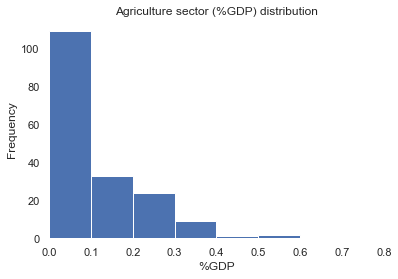

In [16]:
bins=np.arange(0,1,.1)
ax = df['agriculture'].plot(kind='hist', title='Agriculture sector (%GDP) distribution', bins=bins)
ax.set_xlabel('%GDP');
ax.set_xlim(0,.8)
ax.set_ylim(0,)
sns.despine(left=True, bottom=True)

The distribution is very skewed to right, which means that most of the countries have little dependence on agriculture as a font of GDP.

##### Industry

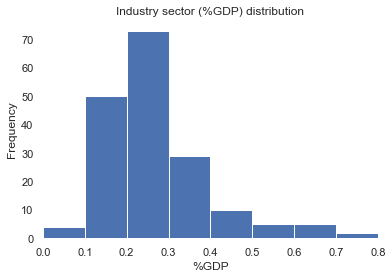

In [17]:
ax = df['industry'].plot(kind='hist', title='Industry sector (%GDP) distribution', bins=bins)
ax.set_xlabel('%GDP');
ax.set_xlim(0,.8)
ax.set_ylim(0,)
sns.despine(left=True, bottom=True)

Industries have a bigger contribution to the GDP than agriculture. Furthermore, some countries are highly industrialized, more than 65% of the GDP comes from the industrial sector.

##### Services

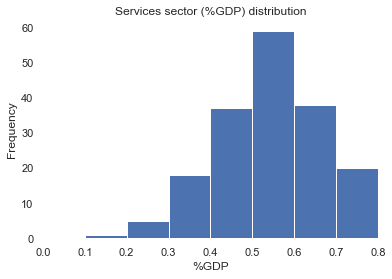

In [18]:
ax = df['services'].plot(kind='hist', title='Services sector (%GDP) distribution', bins=bins)
ax.set_xlabel('%GDP');
ax.set_xlim(0,.8)
ax.set_ylim(0,)
sns.despine(left=True, bottom=True)

Services is clearly the major source of GDP for most countries

##### GDP per capita

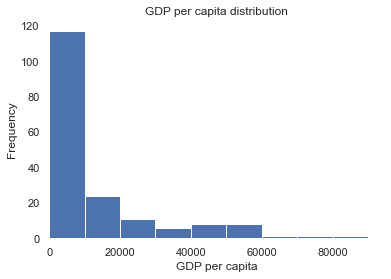

In [19]:
bins=np.arange(0,100000, 10000)
ax = df['GDP_per_capita'].plot(kind='hist', title='GDP per capita distribution', bins=bins)
ax.set_xlabel('GDP per capita');
ax.set_xlim(0,)
ax.set_ylim(0,)
sns.despine(left=True, bottom=True)

The distribution is very skewed to the right, as expected for this kind of plot.

#### Scatter plots
Now that each variable was individually analysed. Let's examine how each of the economic sectors correlates with the GDP per capita of the countries.

##### Agriculture vs GDP per capita

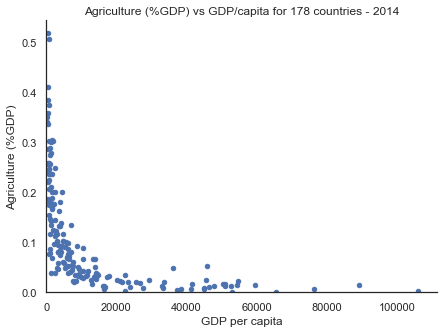

In [20]:
ax = df.plot.scatter(x='GDP_per_capita', y='agriculture',figsize=(7,5), c='b');
ax.set_xlabel('GDP per capita');
ax.set_ylabel('Agriculture (%GDP)');
ax.set_title('Agriculture (%GDP) vs GDP/capita for 178 countries - 2014');
ax.set_xlim(0,)
ax.set_ylim(0,)
sns.despine()

Dividing the countries into four categories based on GDP per capita

In [21]:
bin_edges = [245,1632.5,5500,14500,106000]
bin_names = ['very low','low','high','very high']
df['GDP_PP_categories'] = pd.cut(df['GDP_per_capita'],bin_edges,labels=bin_names)
df.head(3)

,agriculture,industry,services,GDP_per_capita,GDP_PP_categories
Afghanistan,0.221,0.212,0.530,584.0,very low
Albania,0.200,0.215,0.458,4410.0,low
Algeria,0.103,0.423,0.429,4700.0,low


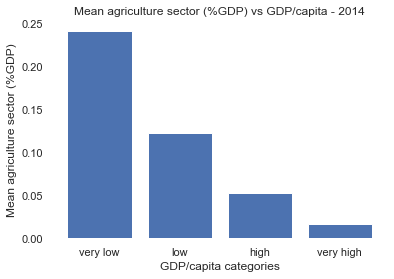

In [22]:
means = df.groupby('GDP_PP_categories').mean()['agriculture']
plt.bar(means.index,means);
plt.title('Mean agriculture sector (%GDP) vs GDP/capita - 2014')
plt.ylabel('Mean agriculture sector (%GDP)')
plt.xlabel('GDP/capita categories')
sns.despine(left=True, bottom=True)

In [23]:
df.groupby('GDP_PP_categories').mean()['agriculture']

GDP_PP_categories
very low     0.241009
low          0.122455
high         0.053064
very high    0.016855
Name: agriculture, dtype: float64

The dependency on agriculture drops exponentially as the GDP per capita grows.
This may be because of a limit on the land available for agriculture. The GDP can not grow over this limit based only on this sector.

##### Industry vs GDP per capita

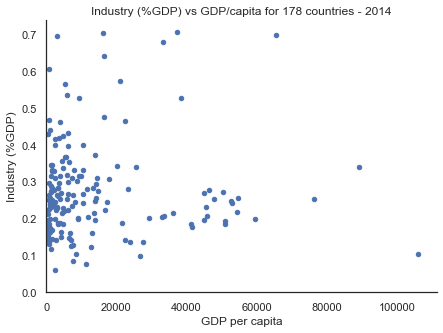

In [24]:
ax = df.plot.scatter(x='GDP_per_capita', y='industry',figsize=(7,5), c='b');
ax.set_xlabel('GDP per capita');
ax.set_ylabel('Industry (%GDP)');
ax.set_title('Industry (%GDP) vs GDP/capita for 178 countries - 2014');
ax.set_xlim(0,)
ax.set_ylim(0,)
sns.despine()

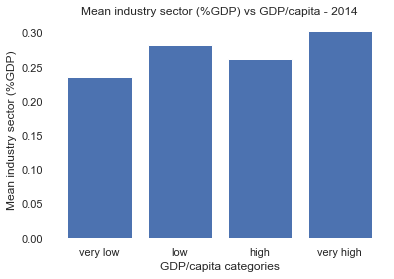

In [25]:
means = df.groupby('GDP_PP_categories').mean()['industry']
plt.bar(means.index,means);
plt.title('Mean industry sector (%GDP) vs GDP/capita - 2014')
plt.ylabel('Mean industry sector (%GDP)')
plt.xlabel('GDP/capita categories')
sns.despine(left=True, bottom=True)

In [26]:
df.groupby('GDP_PP_categories').mean()['industry']

GDP_PP_categories
very low     0.235545
low          0.282234
high         0.261918
very high    0.302687
Name: industry, dtype: float64

Despite the fact countries with high GDP per capita presented on average a low industry ratio compared with countries with low GDP per capita, there is a slight correlation between industrialization and higher GDP per capita. The countries with very high GDP per capita presented a mean industry ratio value 28.54% higher than the countries with very low GDP per capita.

##### Services vs GDP per capita

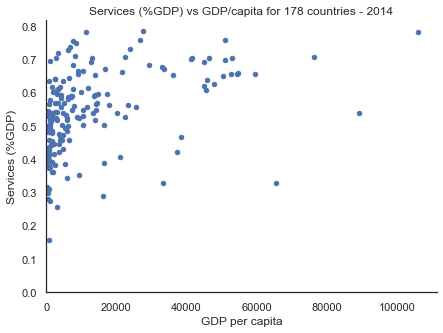

In [27]:
ax = df.plot.scatter(x='GDP_per_capita', y='services',figsize=(7,5), c='b');
ax.set_xlabel('GDP per capita');
ax.set_ylabel('Services (%GDP)');
ax.set_title('Services (%GDP) vs GDP/capita for 178 countries - 2014');
ax.set_xlim(0,)
ax.set_ylim(0,)
sns.despine()

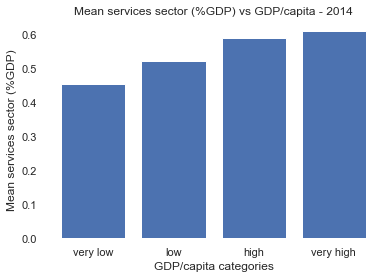

In [28]:
means = df.groupby('GDP_PP_categories').mean()['services']
plt.bar(means.index, means);
plt.title('Mean services sector (%GDP) vs GDP/capita - 2014')
plt.ylabel('Mean services sector (%GDP)')
plt.xlabel('GDP/capita categories')
sns.despine(left=True, bottom=True)

In [29]:
df.groupby('GDP_PP_categories').mean()['services']

GDP_PP_categories
very low     0.453182
low          0.519750
high         0.589045
very high    0.608822
Name: services, dtype: float64

There appears to be a correlation between countries with high GDP per capita and the ratio of the services sector. This correlation is stronger than the one found in the industry sector. The countries with very high GDP per capita presented a mean services ratio value 34.36% higher than the countries with very low GDP per capita. Since services are less depending on infrastructure than industry, it allows the services sector to grow more. Furthermore, when people overcome the need for food (agriculture) and stuff (industry), services become the growing expenditure.

### Which countries had the most increase in the GDP/per capita over the past 5 decades?

First, let's copy the 'GDP per capita' data frame, limited to 5 decades up to 2014 (from 1965 to 2014)

In [30]:
df_gdppc_2 = df_gdppc.loc[:,'1965':'2014']
df_gdppc_2.shape

(191, 50)

Dropping the null values from this new data frame.

In [31]:
df_gdppc_2.dropna(inplace=True)
df_gdppc_2.shape

(93, 50)

Calculating the growth based o the mean value for the first and last decades.

In [32]:
first_decade_mean = df_gdppc_2.loc[:,'2005':'2014'].mean(axis=1)
last_deacade_mean = df_gdppc_2.loc[:,'1965':'1974'].mean(axis=1)
df_gdppc_2['growth'] = first_decade_mean/last_deacade_mean

Sorting the values by the growth

In [33]:
df_gdppc_2.sort_values(by=['growth'],ascending=False,inplace=True)
df_gdppc_2.head(5)

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,growth
country,,,,,,,,,,,,,,,,,,,,,
China,187.0,202.0,185.0,173.0,197.0,229.0,238.0,241.0,254.0,254.0,...,3060.0,3480.0,3800.0,4130.0,4550,4960.0,5330.0,5710.0,6100.0,20.300926
South Korea,1160.0,1260.0,1350.0,1490.0,1670.0,1790.0,1940.0,2050.0,2310.0,2490.0,...,20100.0,21200.0,21700.0,21700.0,23100,23800.0,24200.0,24900.0,25500.0,12.872644
Botswana,497.0,518.0,537.0,581.0,653.0,745.0,910.0,1110.0,1310.0,1370.0,...,6040.0,6400.0,6660.0,6030.0,6430,6730.0,6940.0,7650.0,7860.0,8.070708
Singapore,4090.0,4390.0,4830.0,5400.0,6050.0,6790.0,7490.0,8330.0,9050.0,9440.0,...,42800.0,44700.0,43200.0,42000.0,47200,49200.0,50100.0,51700.0,53100.0,7.052839
Myanmar,170.0,158.0,145.0,159.0,160.0,164.0,167.0,167.0,162.0,167.0,...,671.0,747.0,819.0,899.0,979,1030.0,1090.0,1170.0,1260.0,5.721433


For the countries with the fastest growth, it will be plotted the evolution of GDP per capita, agriculture ratio, industry ratio, and services ratio.

In [34]:
index = df_gdppc_2[:5].index
print(index)

Index(['China', 'South Korea', 'Botswana', 'Singapore', 'Myanmar'], dtype='object', name='country')


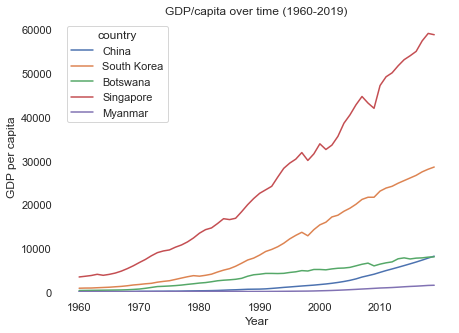

In [35]:
ax = df_gdppc.loc[index].T.plot.line(figsize=(7,5));
ax.set_title('GDP/capita over time (1960-2019)');
ax.set_xlabel('Year');
ax.set_ylabel('GDP per capita');
ax.set_ylim(0,)
sns.despine(left=True, bottom=True)

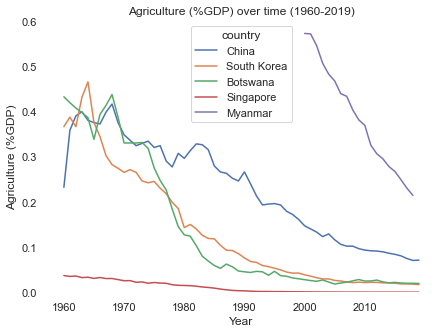

In [36]:
ax = df_agriculture.loc[index].T.plot.line(figsize=(7,5));
ax.set_title('Agriculture (%GDP) over time (1960-2019)');
ax.set_xlabel('Year');
ax.set_ylabel('Agriculture (%GDP)');
ax.set_ylim(0,)
sns.despine(left=True, bottom=True)

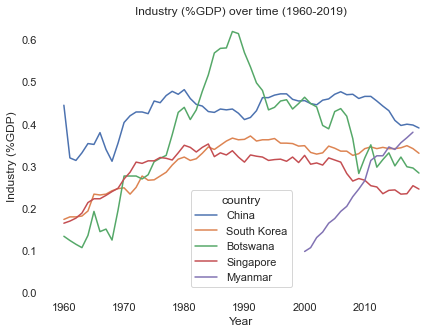

In [37]:
ax = df_industry.loc[index].T.plot.line(figsize=(7,5));
ax.set_title('Industry (%GDP) over time (1960-2019)');
ax.set_xlabel('Year');
ax.set_ylabel('Industry (%GDP)');
ax.set_ylim(0,)
sns.despine(left=True, bottom=True)

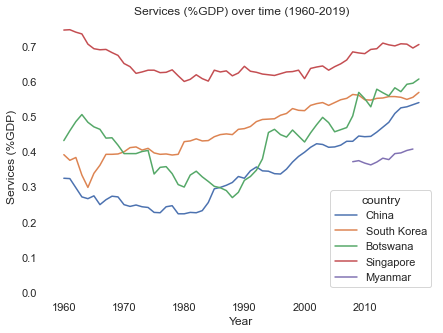

In [38]:
ax = df_services.loc[index].T.plot.line(figsize=(7,5));
ax.set_title('Services (%GDP) over time (1960-2019)');
ax.set_xlabel('Year');
ax.set_ylabel('Services (%GDP)');
ax.set_ylim(0,)
sns.despine(left=True, bottom=True)

Except for Botswana, which is from southern Africa, all countries are from Asia.

These countries presented a relative growth in the industry sector ratio in the '60s and '70s. From the '80s to now, the service sector had grown faster than the industry and agriculture sectors.

<a id='conclusions'></a>
## Conclusions

For the richest countries, the participation of the agriculture sector on the GDP was very low. The most part of the GDP is usually composed of the services sector.

The countries that presented the fast growth in the past 5 decades are China, South Korea, Botswana, Singapore, and Myanmar.